## 문장 기호 자동 추가
문장이 주어졌을 때 문장 부호인 마침표('.')와 쉼표(',') 를 자동으로 추가하는 프로그램을 작성하는 것을 목표로 한다.  
이를 수행하기 위하여 복수의 문장을 입력 받아 Deep Learning Network 을 구성하여 training 하고,  
예시 문장에 대하여 적용하여 실제 동작을 잘 수행하는지 확인 한다  

### data 추상화

예를 들면, 아래와 같이 문장이 주어졌다고 가정하자.  
'''
   "오늘 걷지 않는다면 내일은 뛰어야 한다"
'''
우리가 원하는 결과는 아래와 같을 것이다.  
'''
   "오늘 걷지 않는다면, 내일은 뛰어야 한다."
'''

   
입력된 문장에서 target 을 아래와 같이 구성한다  

```
 문자 : '<nop>'  
   . : '.'  
   , : ','  
```

즉, 위의 예를 다시 쓰면 아래처럼 될 것이다. 
```
   오 : '<nop>'
   늘 : '<nop>'
   ... 
   면 : '<nop>'
   , : ','
   내 : '<nop>'
   ...
   다 : '<nop>'
   . : '.'
```
```
"오늘 걷지 않는다면 내일은 뛰어야 한다"
```
가 들어오면, 
<nop>, ',', '.' 로 이루어진 리스트가 출력되는 문제로 추상화할 수 있다. 
    
     "그러므로 입력 문장에 대하여 이에 대응되는 '<nop>', '.', ',' 로 구성된 출력을 구하는 문제로 정의 할 수 있다.  \n",
    "입력은 문장으로 이루어지고, 출력은 세개의 character 로 구성된 list 가 될 것이다.  \n",
    "  \n",
    "character 단위로 다루면 문장의 의미 파악이 되지 않을 것으로 생각된다. \n",
    "더 좋은 결과를 얻기 위하여서는 문장을 해석해서 처리하는 것이 좋을 것 같으나,  \n",
    "문제를 단순화 하기 위하여 문장을 character 단위로 다루기로 한다.  \n",
    
### preprocessing 

입력은 한글로 된 세종 코퍼스에서 입력 받아 처리하였다.  
입력된 data 중 <p> </p> 로 묶인 문장만을 사용하였다. 

"우선 trainging 을 위하여 입력한 data 를 처리해야 한다. 문장을 입력받으면, 우선 character vector 를 구성한다.  \n",
    "한글의 문자는 그 수가 많으므로,  \n",
    "training data 의 빈도수를 보고, 입력 문자의\n"

    



### 네트워크 구성 
네트워크는 기본 RNN 을 사용한다.  
RNN 의 cell 은 LSTM 을 사용한다.  


In [17]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%autoreload 2

In [19]:
import data

rawdata = data.read_data("data/4BE00006.txt")


length of paragraph:  875


In [23]:
import tensorflow as tf

print(tf.__version__)

1.3.0


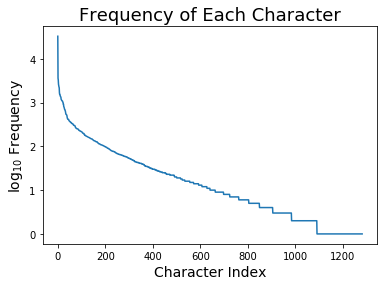

In [20]:
import math, numpy as np, matplotlib.pyplot as plt
import data

sorted_char_map = data.get_sorted_char_map(rawdata)


plt.title('Frequency of Each Character', fontsize=18)
plt.plot(np.array([math.log10(k[1]) for k in sorted_char_map]))
plt.ylabel('$\log_{10}$ Frequency', fontsize=14)
plt.xlabel('Character Index', fontsize=14)
plt.show()

In [ ]:
import data
import utils
import model

input_chars, output_chars = data.make_dic(rawdata)

text = rawdata

char2vec = utils.Char2Vec(chars=input_chars, add_unknown=True)
output_char2vec = utils.Char2Vec(chars=output_chars)
input_size = char2vec.size
output_size = output_char2vec.size

# make and run multi layer LSTM network
hidden_size = 128

rnn_config = model.ModelConfiguration(input_size, hidden_size, output_size, layers=2, bi=False)
base = model.MultiLayerLSTM(rnn_config, char2vec, output_char2vec, text)
base.run()


****** MultiLayer LSTM Initialize ******
****** Model Basic Initialize ******
Tensor("rnn_def/rnn/transpose:0", shape=(?, 30, 128), dtype=float32)
epoch # 24
0.968074
Key: <nop>	Prec: 100.0%	Recall: 6.8	F-Score:  98.4%
Key:   ,	Prec:   0.0%	Recall: 0.0	F-Score:   N/A
Key:   .	Prec:   0.0%	Recall: 0.0	F-Score:   N/A
epoch # 49
0.968074
Key: <nop>	Prec: 100.0%	Recall: 6.8	F-Score:  98.4%
Key:   ,	Prec:   0.0%	Recall: 0.0	F-Score:   N/A
Key:   .	Prec:   0.0%	Recall: 0.0	F-Score:   N/A


### Reference 
https://github.com/episodeyang/deep-auto-punctuation  
